In [2]:
#Imports

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab - DONE
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab -  DONE
import folium # map rendering library

from math import sin, cos, sqrt, atan2, radians



print('Libraries imported.')

ModuleNotFoundError: No module named 'folium'

### Load data 

Data extractet from Barcelona city hall open data. 

Source: https://opendata-ajuntament.barcelona.cat/en/

In [5]:
### Load file with Barcelona neighborhoods
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_634f0334f89f49259087cb8a63af5ecf = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_BDh8zOunGUBK1B1_gxMeEDwKMmz6SlqEtCePSAMsRZY',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_634f0334f89f49259087cb8a63af5ecf.get_object(Bucket='pythonbasics-donotdelete-pr-m6t3t6sj4zu1mf',Key='2019_superficie.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_bcn = df_data_1[['Codi_Barri','Nom_Barri', 'Nom_Districte']]
df_bcn.set_index('Codi_Barri')

df_bcn.head()

,Codi_Barri,Nom_Barri,Nom_Districte
0,1,el Raval,Ciutat Vella
1,2,el Barri Gòtic,Ciutat Vella
2,3,la Barceloneta,Ciutat Vella
3,4,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella
4,5,el Fort Pienc,Eixample


In [6]:
# Extract data from a stored csv file with BCN addresses
body = client_634f0334f89f49259087cb8a63af5ecf.get_object(Bucket='pythonbasics-donotdelete-pr-m6t3t6sj4zu1mf',Key='TAULA_DIRELE.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2 = df_data_2.groupby(['BARRI']).mean().reset_index()

df_coord = df_data_2[['BARRI','LATITUD', 'LONGITUD']]
#df_coord = df_coord.groupby(['BARRI']).mean()

#df_coord.set_index('BARRI')
df_coord.rename(columns={"BARRI":"Codi_Barri"}, inplace=True)

list(df_coord)
df_coord
               

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Codi_Barri,LATITUD,LONGITUD
0,1,41.379878,2.168835
1,2,41.382370,2.176181
2,3,41.379373,2.189934
3,4,41.386124,2.180597
4,5,41.397413,2.180783
5,6,41.405752,2.176447
6,7,41.394536,2.168325
7,8,41.389335,2.154957
8,9,41.383454,2.149162
9,10,41.378282,2.159319


In [7]:
#Merge both dataframes
df_bcn = df_bcn.merge(df_coord)
df_bcn

,Codi_Barri,Nom_Barri,Nom_Districte,LATITUD,LONGITUD
0,1,el Raval,Ciutat Vella,41.379878,2.168835
1,2,el Barri Gòtic,Ciutat Vella,41.382370,2.176181
2,3,la Barceloneta,Ciutat Vella,41.379373,2.189934
3,4,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,41.386124,2.180597
4,5,el Fort Pienc,Eixample,41.397413,2.180783
5,6,la Sagrada Família,Eixample,41.405752,2.176447
6,7,la Dreta de l'Eixample,Eixample,41.394536,2.168325
7,8,l'Antiga Esquerra de l'Eixample,Eixample,41.389335,2.154957
8,9,la Nova Esquerra de l'Eixample,Eixample,41.383454,2.149162
9,10,Sant Antoni,Eixample,41.378282,2.159319


In [8]:
#Extract neighborhoods data
df_bcn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 5 columns):
Codi_Barri       73 non-null int64
Nom_Barri        73 non-null object
Nom_Districte    73 non-null object
LATITUD          73 non-null float64
LONGITUD         73 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 3.4+ KB


### Convert to dataframe

#Remove the Borough not assigned
df_bcn = df_bnc[df_toronto.Nom_barri != 'Not assigned']


In [9]:
#Shape
df_bcn.shape

(73, 5)

### Start mapping the data into map

In [10]:
#with open('geocoder_data.json') as json_data:
#    toronto_data = json.load(json_data)
url = 'https://geocoder.readthedocs.io/index.html'


!pip install geocoder
import geocoder # import geocoder



     |████████████████████████████████| 102kB 9.2MB/s ta 0:00:011


In [11]:
def get_geocoder(postal_code_from_df):
    
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Barcelona, Spain'.format(postal_code_from_df))
        lat_lng_coords = g.latlng
        
    latitude = lat_lng_coords[0]
    print(latitude)
    longitude = lat_lng_coords[1]
    return latitude, longitude

### Filter by District

Decide which district do you want to get the data

In [12]:
#Center map in Barcelona
geolocator = Nominatim(user_agent="Barcelona")
location = geolocator.geocode('Barcelona')
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Barcelona are {}, {}.'.format(latitude, longitude))



The geograpical coordinate of Barcelona are 41.3828939, 2.1774322.


In [14]:
### create map of Barcelona using latitude and longitude values
map_bcn = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_bcn['LATITUD'], df_bcn['LONGITUD'], df_bcn['Nom_Barri'], df_bcn['Nom_Districte']):
    label = '{}, {}'.format(borough, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bcn)  
    
map_bcn


NameError: name 'folium' is not defined

### Foursquare account

In [15]:
#Forusquare credentials
CLIENT_ID = 'BCVCI0ILGJW1T2WJMVB11ZH1UM22ISIEHZ4WEXFNK3WMBHQH' # your Foursquare ID
CLIENT_SECRET = '1WHDSKUWFXUCLRCJSNBW4TF22IGOOOCVQCOB2H12L3S3REHV' # your Foursquare Secret
VERSION = '20191225' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BCVCI0ILGJW1T2WJMVB11ZH1UM22ISIEHZ4WEXFNK3WMBHQH
CLIENT_SECRET:1WHDSKUWFXUCLRCJSNBW4TF22IGOOOCVQCOB2H12L3S3REHV


In [16]:
# defining radius and limit of venues to get
radius=500
LIMIT=100

In [17]:
# limit research to restaurants (foof)
SECTION = "food"

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&section={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            SECTION,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
# type your answer here

bcn_venues = getNearbyVenues(names=df_bcn['Nom_Barri'],
                                   latitudes=df_bcn['LATITUD'],
                                   longitudes=df_bcn['LONGITUD']
                                  )



el Raval
el Barri Gòtic
la Barceloneta
Sant Pere, Santa Caterina i la Ribera
el Fort Pienc
la Sagrada Família
la Dreta de l'Eixample
l'Antiga Esquerra de l'Eixample
la Nova Esquerra de l'Eixample
Sant Antoni
el Poble Sec
la Marina del Prat Vermell
la Marina de Port
la Font de la Guatlla
Hostafrancs
la Bordeta
Sants - Badal
Sants
les Corts
la Maternitat i Sant Ramon
Pedralbes
Vallvidrera, el Tibidabo i les Planes
Sarrià
les Tres Torres
Sant Gervasi - la Bonanova
Sant Gervasi - Galvany
el Putxet i el Farró
Vallcarca i els Penitents
el Coll
la Salut
la Vila de Gràcia
el Camp d'en Grassot i Gràcia Nova
el Baix Guinardó
Can Baró
el Guinardó
la Font d'en Fargues
el Carmel
la Teixonera
Sant Genís dels Agudells
Montbau
la Vall d'Hebron
la Clota
Horta
Vilapicina i la Torre Llobeta
Porta
el Turó de la Peira
Can Peguera
la Guineueta
Canyelles
les Roquetes
Verdun
la Prosperitat
la Trinitat Nova
Torre Baró
Ciutat Meridiana
Vallbona
la Trinitat Vella
Baró de Viver
el Bon Pastor
Sant Andreu
la Sagrer

In [20]:
bcn_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,el Raval,41.379878,2.168835,La Robadora,41.379500,2.170463,Gastropub
1,el Raval,41.379878,2.168835,A Tu Bola,41.380096,2.169054,Tapas Restaurant
2,el Raval,41.379878,2.168835,Guixot,41.378509,2.167806,Spanish Restaurant
3,el Raval,41.379878,2.168835,Teddys - Libanés,41.380939,2.167959,Fast Food Restaurant
4,el Raval,41.379878,2.168835,Ófis Restaurant,41.378636,2.170668,Mediterranean Restaurant


In [21]:
bcn_venues.shape

(2446, 7)

In [22]:
bcn_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Baró de Viver,5,5,5,5,5,5
Can Baró,15,15,15,15,15,15
Can Peguera,5,5,5,5,5,5
Canyelles,4,4,4,4,4,4
Ciutat Meridiana,4,4,4,4,4,4
Diagonal Mar i el Front Marítim del Poblenou,32,32,32,32,32,32
Horta,22,22,22,22,22,22
Hostafrancs,31,31,31,31,31,31
Montbau,4,4,4,4,4,4


In [23]:
### TRIAL Analyze each neighborhood - ONLY RESTAURANTS
#bcn_venues.groupby('Venue Category').count()

#df[df['A'].str.contains("hello")]
#bcn_rest = bcn_venues[bcn_venues['Venue Category'].str.contains("Restaurant")]

In [24]:


#one hot encoding
bcn_onehot = pd.get_dummies(bcn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bcn_onehot['Neighborhood'] = bcn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bcn_onehot.columns[-1]] + list(bcn_onehot.columns[:-1])
bcn_onehot = bcn_onehot[fixed_columns]

bcn_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Cafeteria,Café,Cambodian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Creperie,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fondue Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Grilled Meat Restaurant,Halal Restaurant,Hawaiian Restaurant,Hot Dog Joint,Hungarian Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Mac & Cheese Joint,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,Noodle House,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pet Café,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Snack Place,South American Restaurant,South Indian Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wings Joint
0,el Raval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,el Raval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,el Raval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,el Raval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,el Raval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


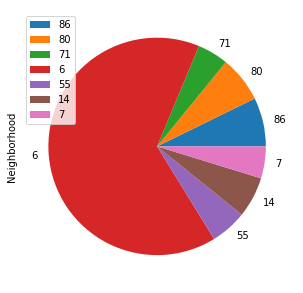

In [79]:
#
#
#
#
#

bcn_plot = bcn_venues.groupby('Venue Category').count().reset_index()

#Filter those over a min
num = len(bcn_plot['Neighborhood'])
suma = bcn_plot['Neighborhood'].sum()

#df.loc[df[‘column name’] condition]
bcn_plot_max = bcn_plot.loc[bcn_plot['Neighborhood'] >= 150]
bcn_plot_max

num = len(bcn_plot_max['Neighborhood'])

#new_row = {'Venue Category':'Rest', 'Neighborhood':suma-num, 'Neighborhood Latitude':suma-num, 'Neighborhood Longitude' :suma-num, 'Venue':suma-num,'Venue Latitude':suma-num,'Venue Longitude':suma-num}
bcn_plot_max.loc[num]= ['Rest', suma-num, suma-num, suma-num, suma-num, suma-num, suma-num] #{'Venue Category':'Rest', 'Neighborhood':suma-num, 'Neighborhood Latitude':suma-num, 'Neighborhood Longitude' :suma-num, 'Venue':suma-num,'Venue Latitude':suma-num,'Venue Longitude':suma-num}
#bcn_plot_max = bcn_plot_max.append(new_row, ignore_index=True)
#bcn_plot_max

bcn_plot_max.sort_values('Venue Category', ascending=False).plot.pie(y='Neighborhood', figsize=(5, 5))


#plt.show()



In [ ]:
df_plot = 
#df = pd(bcn_onehot, columns=['Neighborhood','Bakery'])
bcn_onehot.plot(x ='Neighborhood', y='Bakery', kind = 'bar')
plt.show()

In [1]:
### Group rows by neighborhood and by the mean of occurrence
bcn_grouped = bcn_onehot.groupby('Neighborhood').mean().reset_index()
bcn_grouped


NameError: name 'bcn_onehot' is not defined

In [25]:
#### Let's print each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in bcn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bcn_grouped[bcn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Baró de Viver----
              venue  freq
0  Asian Restaurant   0.2
1             Diner   0.2
2     Deli / Bodega   0.2
3  Tapas Restaurant   0.2
4        Restaurant   0.2


----Can Baró----
                venue  freq
0  Spanish Restaurant  0.27
1  Chinese Restaurant  0.13
2              Bakery  0.13
3    Tapas Restaurant  0.13
4                Café  0.07


----Can Peguera----
                 venue  freq
0                 Café   0.4
1           Restaurant   0.2
2    German Restaurant   0.2
3   Spanish Restaurant   0.2
4  Moroccan Restaurant   0.0


----Canyelles----
                      venue  freq
0          Tapas Restaurant  0.50
1  Mediterranean Restaurant  0.25
2                      Café  0.25
3        African Restaurant  0.00
4       Moroccan Restaurant  0.00


----Ciutat Meridiana----
                      venue  freq
0                    Bakery  0.50
1                      Café  0.25
2  Mediterranean Restaurant  0.25
3        African Restaurant  0.00
4     Portuguese R

In [26]:
### Put in pandas dataframe


In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bcn_grouped['Neighborhood']

for ind in np.arange(bcn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bcn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted#.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baró de Viver,Diner,Restaurant,Asian Restaurant,Deli / Bodega,Tapas Restaurant,Food Court,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant
1,Can Baró,Spanish Restaurant,Chinese Restaurant,Tapas Restaurant,Bakery,Snack Place,Café,Cambodian Restaurant,Italian Restaurant,Fried Chicken Joint,Fondue Restaurant
2,Can Peguera,Café,Spanish Restaurant,Restaurant,German Restaurant,Wings Joint,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
3,Canyelles,Tapas Restaurant,Café,Mediterranean Restaurant,Wings Joint,Food Court,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
4,Ciutat Meridiana,Bakery,Mediterranean Restaurant,Café,Wings Joint,Food Truck,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop
5,Diagonal Mar i el Front Marítim del Poblenou,Mediterranean Restaurant,Restaurant,Café,Spanish Restaurant,Hot Dog Joint,Diner,Bakery,Thai Restaurant,Pizza Place,Breakfast Spot
6,Horta,Bakery,Sandwich Place,Tapas Restaurant,Café,Pizza Place,German Restaurant,Mediterranean Restaurant,Restaurant,Breakfast Spot,Spanish Restaurant
7,Hostafrancs,Tapas Restaurant,Restaurant,Spanish Restaurant,Burger Joint,Pizza Place,Mediterranean Restaurant,Breakfast Spot,Bistro,Peruvian Restaurant,Deli / Bodega
8,Montbau,Restaurant,Mediterranean Restaurant,Breakfast Spot,Wings Joint,Food Court,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
9,Navas,Bakery,Spanish Restaurant,Tapas Restaurant,Café,Asian Restaurant,Mexican Restaurant,Restaurant,Italian Restaurant,Indian Restaurant,Diner


In [29]:
### Cluster neighborhoods

# set number of clusters
kclusters = 5

bcn_grouped_clustering = bcn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bcn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 4, 1, 4, 1, 0, 1, 0, 0, 1], dtype=int32)

In [30]:
# add clustering labels
#Run only once
neighborhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_) 

bcn_merged = df_bcn

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bcn_merged = bcn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Nom_Barri')

bcn_merged.tail() # check the last columns!

,Codi_Barri,Nom_Barri,Nom_Districte,LATITUD,LONGITUD,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,69,Diagonal Mar i el Front Marítim del Poblenou,Sant Martí,41.405901,2.210925,0.0,Mediterranean Restaurant,Restaurant,Café,Spanish Restaurant,Hot Dog Joint,Diner,Bakery,Thai Restaurant,Pizza Place,Breakfast Spot
69,70,el Besòs i el Maresme,Sant Martí,41.415938,2.214151,0.0,Breakfast Spot,Spanish Restaurant,Diner,Restaurant,Tapas Restaurant,Mediterranean Restaurant,Food Court,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant
70,71,Provençals del Poblenou,Sant Martí,41.411017,2.202982,0.0,Mediterranean Restaurant,Spanish Restaurant,Pizza Place,Café,Breakfast Spot,Asian Restaurant,Bistro,Restaurant,Steakhouse,Kebab Restaurant
71,72,Sant Martí de Provençals,Sant Martí,41.416634,2.197915,1.0,Tapas Restaurant,Bakery,Café,Pizza Place,Asian Restaurant,Restaurant,Spanish Restaurant,Mediterranean Restaurant,Wings Joint,Empanada Restaurant
72,73,la Verneda i la Pau,Sant Martí,41.423191,2.203821,1.0,Tapas Restaurant,Café,Bakery,Wings Joint,Vegetarian / Vegan Restaurant,Falafel Restaurant,Italian Restaurant,Fast Food Restaurant,Sandwich Place,Food


In [31]:

#clean data
bcn_merged=bcn_merged.dropna()
#Cluster labels type
bcn_merged['Cluster_Labels'] = bcn_merged.Cluster_Labels.astype(int)


In [32]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bcn_merged['LATITUD'], bcn_merged['LONGITUD'], bcn_merged['Nom_Barri'], bcn_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [33]:
### Examine clusters

bcn_merged.loc[bcn_merged['Cluster_Labels'] == 0, bcn_merged.columns[[1] + list(range(5, bcn_merged.shape[1]))]]

,Nom_Barri,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,el Raval,0,Spanish Restaurant,Tapas Restaurant,Mediterranean Restaurant,Pizza Place,Café,Italian Restaurant,Seafood Restaurant,Burger Joint,Vegetarian / Vegan Restaurant,Restaurant
2,la Barceloneta,0,Paella Restaurant,Mediterranean Restaurant,Tapas Restaurant,Seafood Restaurant,Spanish Restaurant,Restaurant,Burger Joint,Bakery,Café,Pizza Place
3,"Sant Pere, Santa Caterina i la Ribera",0,Tapas Restaurant,Café,Spanish Restaurant,Breakfast Spot,Italian Restaurant,Japanese Restaurant,Restaurant,Mediterranean Restaurant,Mexican Restaurant,Burger Joint
4,el Fort Pienc,0,Spanish Restaurant,Restaurant,Café,Chinese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Diner,Bakery,Bistro,Indian Restaurant
5,la Sagrada Família,0,Tapas Restaurant,Italian Restaurant,Restaurant,Bakery,Pizza Place,Spanish Restaurant,Deli / Bodega,Burger Joint,Sandwich Place,Café
6,la Dreta de l'Eixample,0,Tapas Restaurant,Mediterranean Restaurant,Restaurant,Seafood Restaurant,Café,Italian Restaurant,Spanish Restaurant,Japanese Restaurant,Paella Restaurant,Bakery
7,l'Antiga Esquerra de l'Eixample,0,Spanish Restaurant,Mediterranean Restaurant,Japanese Restaurant,Bakery,Café,Tapas Restaurant,Seafood Restaurant,Italian Restaurant,Restaurant,Sandwich Place
8,la Nova Esquerra de l'Eixample,0,Mediterranean Restaurant,Café,Spanish Restaurant,Indian Restaurant,Japanese Restaurant,Bakery,Italian Restaurant,Tapas Restaurant,Snack Place,Food Truck
9,Sant Antoni,0,Tapas Restaurant,Café,Mediterranean Restaurant,Restaurant,Spanish Restaurant,Italian Restaurant,Japanese Restaurant,Argentinian Restaurant,Burger Joint,Bakery
13,la Font de la Guatlla,0,Spanish Restaurant,Café,Mediterranean Restaurant,Tapas Restaurant,Breakfast Spot,Bakery,Pizza Place,Japanese Restaurant,Diner,Peruvian Restaurant


In [35]:
bcn_merged.loc[bcn_merged['Cluster_Labels'] == 1, bcn_merged.columns[[1] + list(range(5, bcn_merged.shape[1]))]]

,Nom_Barri,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,la Marina de Port,1,Breakfast Spot,Spanish Restaurant,Café,Bakery,Restaurant,Chinese Restaurant,Mediterranean Restaurant,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant
16,Sants - Badal,1,Bakery,Café,Pizza Place,Tapas Restaurant,Italian Restaurant,Restaurant,Mexican Restaurant,Spanish Restaurant,Hot Dog Joint,Japanese Restaurant
19,la Maternitat i Sant Ramon,1,Café,Mediterranean Restaurant,Bakery,Tapas Restaurant,Pizza Place,Chinese Restaurant,Sandwich Place,Burger Joint,Breakfast Spot,Spanish Restaurant
20,Pedralbes,1,Mediterranean Restaurant,Café,Hot Dog Joint,Pizza Place,Spanish Restaurant,Food,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant
22,Sarrià,1,Bakery,Mediterranean Restaurant,Breakfast Spot,Restaurant,Café,Tapas Restaurant,Food Truck,French Restaurant,Diner,Japanese Restaurant
27,Vallcarca i els Penitents,1,Café,Restaurant,Spanish Restaurant,Bakery,Snack Place,Thai Restaurant,Pizza Place,Chinese Restaurant,Breakfast Spot,Burger Joint
28,el Coll,1,Bakery,Mac & Cheese Joint,Mediterranean Restaurant,Café,Wings Joint,Food Truck,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
29,la Salut,1,Bakery,Spanish Restaurant,Sandwich Place,Café,Tapas Restaurant,Restaurant,Mediterranean Restaurant,Breakfast Spot,Cambodian Restaurant,Food
32,el Baix Guinardó,1,Tapas Restaurant,Bakery,Café,Japanese Restaurant,Breakfast Spot,Falafel Restaurant,Pizza Place,Deli / Bodega,Restaurant,Spanish Restaurant
40,la Vall d'Hebron,1,Restaurant,Spanish Restaurant,Bakery,Mediterranean Restaurant,Café,Argentinian Restaurant,Chinese Restaurant,Food Court,Ethiopian Restaurant,Falafel Restaurant


In [36]:
bcn_merged.loc[bcn_merged['Cluster_Labels'] == 2, bcn_merged.columns[[1] + list(range(5, bcn_merged.shape[1]))]]

,Nom_Barri,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
55,Vallbona,2,Food,Wings Joint,Food Truck,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fondue Restaurant


In [37]:
bcn_merged.loc[bcn_merged['Cluster_Labels'] == 3, bcn_merged.columns[[1] + list(range(5, bcn_merged.shape[1]))]]

,Nom_Barri,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
53,Torre Baró,3,Spanish Restaurant,Wings Joint,Donut Shop,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop


In [38]:
bcn_merged.loc[bcn_merged['Cluster_Labels'] == 4, bcn_merged.columns[[1] + list(range(5, bcn_merged.shape[1]))]]

,Nom_Barri,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,el Barri Gòtic,4,Tapas Restaurant,Spanish Restaurant,Italian Restaurant,Mediterranean Restaurant,Café,Restaurant,Seafood Restaurant,Falafel Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant
10,el Poble Sec,4,Tapas Restaurant,Mediterranean Restaurant,Café,Spanish Restaurant,Restaurant,Pizza Place,Italian Restaurant,Asian Restaurant,Chinese Restaurant,Seafood Restaurant
33,Can Baró,4,Spanish Restaurant,Chinese Restaurant,Tapas Restaurant,Bakery,Snack Place,Café,Cambodian Restaurant,Italian Restaurant,Fried Chicken Joint,Fondue Restaurant
35,la Font d'en Fargues,4,Spanish Restaurant,Restaurant,Tapas Restaurant,Wings Joint,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
37,la Teixonera,4,Mediterranean Restaurant,Spanish Restaurant,Tapas Restaurant,Bakery,Food Truck,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
48,Canyelles,4,Tapas Restaurant,Café,Mediterranean Restaurant,Wings Joint,Food Court,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
51,la Prosperitat,4,Tapas Restaurant,Spanish Restaurant,Pizza Place,Fried Chicken Joint,Asian Restaurant,Italian Restaurant,Bakery,Restaurant,Sushi Restaurant,Wings Joint
52,la Trinitat Nova,4,Spanish Restaurant,Tapas Restaurant,Bakery,Breakfast Spot,Food Truck,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
56,la Trinitat Vella,4,Tapas Restaurant,Spanish Restaurant,Food,Wings Joint,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
61,el Congrés i els Indians,4,Tapas Restaurant,Bakery,Restaurant,Pizza Place,Spanish Restaurant,Asian Restaurant,Gastropub,Food,Falafel Restaurant,Chinese Restaurant


### Electric car parking information

Load information related to car parking spots

In [119]:
### Load data about electric car parking in BCN
body = client_634f0334f89f49259087cb8a63af5ecf.get_object(Bucket='pythonbasics-donotdelete-pr-m6t3t6sj4zu1mf',Key='PUNTS_RECARREGA_VEHICLES_ELECTRICS.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()

df_ecarpark = df_data_3[['TIPO_CONNECTOR','POTENCIA_MAXIMA_DE_CARGA_(W)', 'NUM_DE_CONNECTORS_AL_EQUIP', 'TIPOLOGIA_DE_CARREGA', 'LATITUD', 'LONGITUD']]
df_ecarpark.head()


,TIPO_CONNECTOR,POTENCIA_MAXIMA_DE_CARGA_(W),NUM_DE_CONNECTORS_AL_EQUIP,TIPOLOGIA_DE_CARREGA,LATITUD,LONGITUD
0,CHADEMO,50000,3,RÀPIDA,41.393464,2.204479
1,MENNEKES,43000,3,RÀPIDA,41.393464,2.204479
2,COMBO 2,50000,3,RÀPIDA,41.393464,2.204479
3,CHADEMO,50000,3,RÀPIDA,41.401033,2.122821
4,MENNEKES,43000,3,RÀPIDA,41.401033,2.122821


In [120]:
#Measure distance between two data points

def get_distance(lat1, lon1, lat2, lon2):

    # approximate radius of earth in km

    R = 6373.0
    
   # for lat, lon in zip(lat2, lon2)

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [152]:
#Select the reference 
#geopy.distance.vincenty(coords_1, coords_2).km

# La Vila de Gracia 41.403226	2.157236
lat1 = df_bcn.iloc[30][3]
lon1 = df_bcn.iloc[30][4]

df_dist = pd.DataFrame()
distance = []
# type your answer here

#for lat,lon in df_ecopark

# iterate through each row and select  
# 'Name' and 'Age' column respectively. 
for i in range(len(df_ecarpark)) : 
    dist = get_distance(lat1, lon1, df_ecarpark.loc[i, "LATITUD"], df_ecarpark.loc[i, "LONGITUD"]) 
    distance.append(dist)

df_ecarpark['DIST'] = distance

   
df_ecarpark=df_ecarpark.sort_values(by='DIST')
df_parking = df_ecarpark.head(5)
df_parking.reset_index()

,index,TIPO_CONNECTOR,POTENCIA_MAXIMA_DE_CARGA_(W),NUM_DE_CONNECTORS_AL_EQUIP,TIPOLOGIA_DE_CARREGA,LATITUD,LONGITUD,DIST
0,294,SCHUKO,3600,2,LENTA,41.425848,2.184141,0.410858
1,403,MENNEKES,3600,2,LENTA,41.393989,2.181742,0.410858
2,56,SCHUKO,3600,2,LENTA,41.407187,2.218089,0.410858
3,169,CHADEMO,5000,3,RÀPIDA,41.409873,2.203166,0.410858
4,317,MENNEKES,3600,2,LENTA,41.402132,2.204561,0.528800


In [153]:
# create map
map_parking = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to the map
for lat, lon, conector, potencia_max in zip(df_parking['LATITUD'], df_parking['LONGITUD'], df_parking['TIPO_CONNECTOR'], df_parking['POTENCIA_MAXIMA_DE_CARGA_(W)']):
    label = '{}, {}'.format(lat, lon)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_parking)  
    


map_parking